In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('movies.csv', lineterminator = '\n')

In [ ]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
        9837 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [ ]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


* Exploration Summary
* We have a dataframe consisting of 9827 rows and 9 columns.
* Our dataset looks a bit tidy with no Nans nor duplicated values.
* Release_Date column needs to be casted into date time and to extract only the year value.
* Overview, Original_Language and Poster_Url wouldn't be so useful during analysis, so we'll drop them.
* there is no noticable outliers in popularity column.
* Vote_Average better be categorised for proper analysis.
* Genre column has comma seperated values and white spaces that needs to be handled and casted into category.


In [ ]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [ ]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce', dayfirst=True)
df['Release_Date'] = df['Release_Date'].dt.year.astype('Int64')
print(df.dtypes)
df.head()

Release_Date           Int64
Title                 object
Overview              object
Popularity           float64
Vote_Count            object
Vote_Average          object
Original_Language     object
Genre                 object
Poster_Url\r          object
dtype: object


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


* Dropping the columns

In [ ]:
cols = ['Overview','Original_Language','Poster_Url\r']

In [ ]:
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7,"Action, Adventure, Thriller, War"


* Categorizing Vote_Average column

* We would cut the Vote_Average values and make 4 categories popular,average,below_avg,not_popular to describe it more using categorize_col() funtion provided above

In [ ]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')


In [ ]:
print('Vote_Average' in df.columns)
print(df['Vote_Average'].dtype)
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')

True
object


In [ ]:
print(df['Vote_Average'].describe())

count    9826.000000
mean        6.439467
std         1.129797
min         0.000000
25%         5.900000
50%         6.500000
75%         7.100000
max        10.000000
Name: Vote_Average, dtype: float64


In [ ]:
def categorize_col(df, col, labels):
    desc = df[col].describe()
    edges = [
            desc['min'],
            desc['25%'],
            desc['50%'],
            desc['75%'],
            desc['max']
            ]
    df[col] = pd.cut(df[col], bins=edges, labels=labels, duplicates='drop')
    return df

In [ ]:
labels = ['not_popular', 'below_avg', 'average', 'popular']

categorize_col(df, 'Vote_Average', labels)

df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [ ]:
print(df['Vote_Average'].unique())
print(df['Vote_Average'].value_counts())

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']
Vote_Average
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64


In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


* We'll split genres into a list and then explore our dataframe to have only one genre per row for each movie.

In [ ]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [ ]:
#casting column into category
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25803 entries, 0 to 25802
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  Int64   
 1   Title         25794 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  object  
 4   Vote_Average  25551 non-null  category
 5   Genre         25792 non-null  category
dtypes: Int64(1), category(2), float64(1), object(2)
memory usage: 883.0+ KB


In [ ]:
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce')

In [ ]:
df = df.dropna(subset=['Vote_Count'])

In [ ]:
df['Vote_Count'] = df['Vote_Count'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25792 entries, 0 to 25802
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25792 non-null  Int64   
 1   Title         25792 non-null  object  
 2   Popularity    25792 non-null  float64 
 3   Vote_Count    25792 non-null  int32   
 4   Vote_Average  25551 non-null  category
 5   Genre         25792 non-null  category
dtypes: Int64(1), category(2), float64(1), int32(1), object(1)
memory usage: 983.2+ KB


In [ ]:
df.nunique()

Release_Date     102
Title           9512
Popularity      8159
Vote_Count      3266
Vote_Average       4
Genre             19
dtype: int64

In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


# Data Visualization

In [ ]:
sns.set_style('whitegrid')

# What is the most frequent genre in the dataset?

In [ ]:
df['Genre'].describe()

count     25792
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

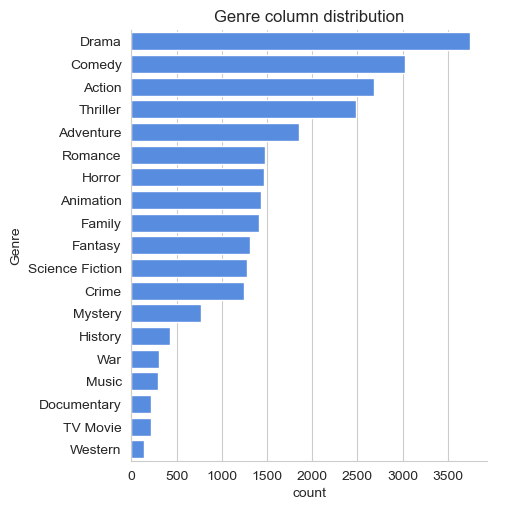

In [ ]:
sns.catplot(y = 'Genre' , data = df, kind = 'count',
           order = df['Genre'].value_counts().index,
           color = '#4287f5')
plt.title('Genre column distribution')
plt.show()

# Which category has height vote counts in vote_Avg column?

In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


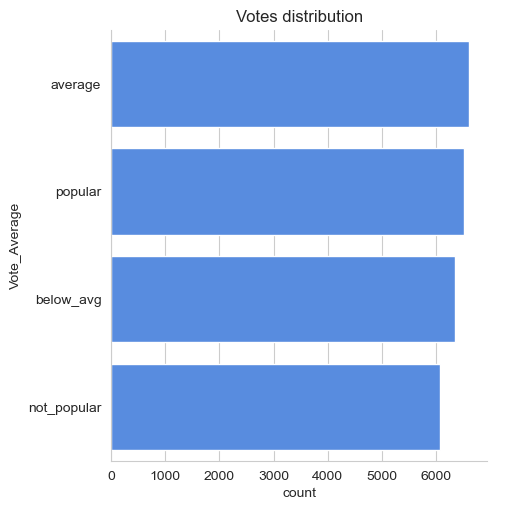

In [ ]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
           order = df['Vote_Average'].value_counts().index,
           color = '#4287f5')
plt.title('Votes distribution')
plt.show()

# Which movie got the highest popularity?what's its genre?

In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [ ]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# Which movie got the lowest popularity?what's its genre?

In [ ]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25797,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25798,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25799,2021,The United States vs. Billie Holiday,13.354,152,average,History
25800,1984,Threads,13.354,186,popular,War
25801,1984,Threads,13.354,186,popular,Drama
25802,1984,Threads,13.354,186,popular,Science Fiction


# Which year has the most flimmed movies?

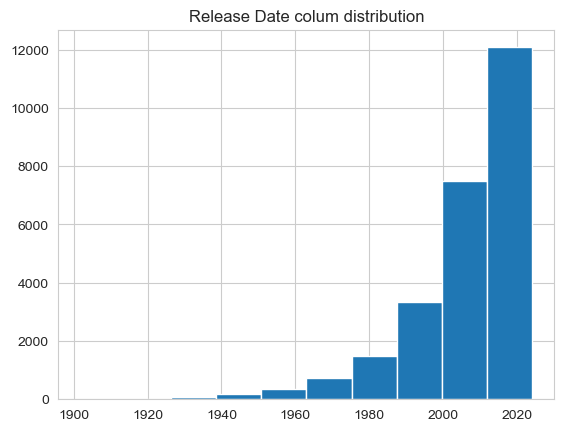

In [ ]:
df['Release_Date'].hist()
plt.title('Release Date colum distribution')
plt.show()

Conclusion:

Q1: What is the most frequent genre in the dataset?
 ANS: Drama is the most frequent genre in the dataset.

Q2: Which category has height vote counts in vote_Avg column?
 ANS: Average has heights votes count in vote_Avg column.

Q3: Which movie got the highest popularity? what's its genre?
 ANS: Spider-Man: No Way Home movie got the highest popularity and its genres are Action,Adventure and Science Fiction.

Q4: Which movie got the lowest popularity? what's its genre?
 ANS: The United States vs. Billie Holiday got the lowest popularity and its genres are Music,Drama and History.

Q5: Which year has the most flimmed movies?
 ANS: 2020 year has the most flimmed movies.

 